# Analysis of Dynamic Systems

## Schedule:

- Getting started
- Introduction
- Mathematical bases
- Bode diagrams
- Modeling with linear elements
- State variables
- Block diagrams
- Time response
- Frequency response
- Stability
- Root Locus
- Final project
- Course evaluation

## Mathematical bases

- Complex Variable Theory.
- Differential equations.
- Laplace transform.
- Theory of matrices.
- Bode diagrams.

In [1]:
# Run this only in Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
colab_path = '/content/drive/My Drive/Colab Notebooks/dynamic-ud/notebooks/img/'
my_path = 'img/'
valid_path = colab_path # Use one of them depending on the platform

In [3]:
# Run this only in Colab
# Rendering SymPy equations in Colab requires the MathJax javascript library
from IPython.display import Math, HTML

def load_mathjax_in_cell_output():
  display(HTML("<script src='https://www.gstatic.com/external_hosted/"
               "mathjax/latest/MathJax.js?config=default'></script>"))
get_ipython().events.register('pre_run_cell', load_mathjax_in_cell_output)

In [7]:
import sympy
from sympy import *
sympy.init_printing()
s = Symbol('s')
t = Symbol('t', positive=True)

### Laplace's Transform

It is a tool used for the solution of linear differential equations.

$\Longrightarrow\;$ **Definition:** For a function $f(t)$ such that:

$$\intop_{0}^{\infty}\left|f\left(t\right)e^{\sigma t}\right|dt<\infty$$

For a finite real value of $\sigma$, the Laplace transform of $f(t)$ is defined as:

$$\mathcal{F}\left(s\right)=\intop_{0}^{\infty}f\left(t\right)e^{-st}dt$$

This is the unilateral Laplace transform. Or in notation:

$$F\left ( s \right ) = \mathfrak{L} \left [ f\left ( t \right ) \right ]$$

- The variable $s$ is known as the Laplace operator, and is a complex variable.
- All the information contained in $f(t)$ prior to $t = 0$ is ignored or considered equal to zero, this does not normally affect calculations since the time reference that is normally used is $t = 0$.
- We will not use the definition of the Laplace transform, but the tables of the books.

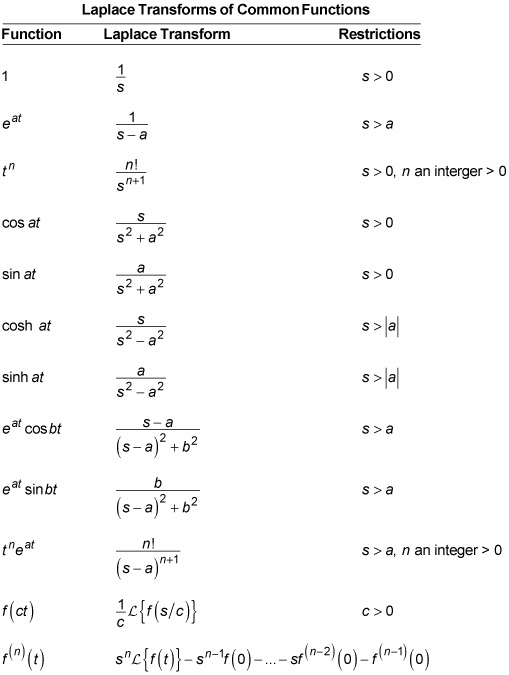

In [4]:
from IPython.display import Image
Image(filename=valid_path + 'laplace_fig1.png')

**Example:** Consider a unitary step function $f(t)$:

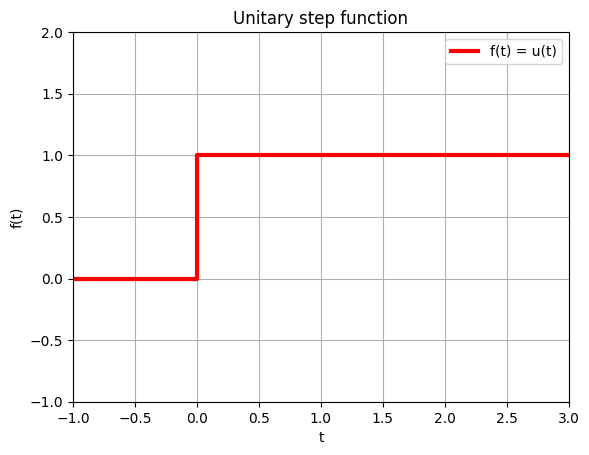

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = [-1, 0, 0, 1, 2, 3]
y = [0, 0, 1, 1, 1, 1]

plt.plot(x, y, 'r', label='f(t) = u(t)', linewidth=3)
plt.title('Unitary step function')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.xlim(-1, 3)
plt.ylim(-1, 2)
plt.grid()
plt.show()

$$F\left ( s \right ) = \mathfrak{L}\left [ u\left ( t \right ) \right ] = \int_{0}^{\infty } u\left ( t \right ) e^{-st} dt$$

$$\Rightarrow \, F\left ( s \right ) = \left [  - \frac{1}{s} e^{-st}    \right ] _{0}^{\infty } = \frac{1}{s}$$

### Inverse of Laplace Transforms

It seeks to obtain $f(t)$ from $F(s)$.

$$f\left ( t \right ) = \boldsymbol{\mathfrak{L}}^{-1} \left [ F\left ( s \right ) \right ]$$

$$f\left ( t \right ) = \frac{1}{2\pi j} \int_{c-j\infty }^{c+j\infty } F\left ( s \right ) e^{st} ds$$

### Theorems

**1.** Multiplication by a constant

$$\boldsymbol{\mathfrak{L}} \left [ k \, f \left (t \right ) \right ] = k \, F \left (s \right )$$

**2.** add and subtract

$$\mathfrak{L} \left [ f_1 \left ( t \right ) \pm f_2 \left ( t \right ) \right ] = F_1 \left ( s \right ) \pm  F_2 \left ( s \right )$$

**3.** Differentiation

$$\mathfrak{L} \left [ \frac{d\, f\left ( t \right )}{dt} \right ] = s \, F\left ( s \right ) - \lim_{t \to 0} f\left ( t \right ) = s \, F\left ( s \right ) - f\left ( 0 \right )$$

$$\mathfrak{L} \left [ \frac{d^n \, f\left ( t \right )}{dt^n} \right ] = s^n \, F\left ( s \right ) - \lim_{t \to 0} \left [ s^{n-1} f\left ( t \right ) + s^{n-2} \frac{df\left ( t \right )}{dt} + \cdots +s^{0} \frac{d^{n-1} f\left ( t \right )}{dt^{n-1}} \right ]$$

$$\mathfrak{L} \left [ \frac{d^n \, f\left ( t \right )}{dt^n} \right ] = s^n \, F\left ( s \right ) - s^{n-1} f\left ( 0 \right ) - s^{n-2} f^{\left ( 1 \right )} - \cdots - f^{\left ( n-1 \right )} \left ( 0 \right )$$

**4.** Integration

$$\mathfrak{L} \left [ \int_{0}^{t} f\left ( \tau  \right ) d\tau \right ] = \frac{F\left ( s \right )}{s}$$

$$\mathfrak{L} \left [ \int_{0}^{t_1} \int_{0}^{t_2} \cdots \int_{0}^{t_n} f\left ( \tau  \right ) d\tau \, dt_1 \cdots dt_{n-1}\right ] = \frac{F\left ( s \right )}{s^n}$$

**5.** Time shift (the signal appears later in time)

$$\mathfrak{L} \left [ f\left ( t-T \right ) u\left ( t-T \right )\right ] = e^{-Ts} F\left ( s \right )$$

Where $u\left ( t-T \right )$ is the unitary step offset to the right.

**6.** Initial value theorem

$$\lim _{t \to 0} f\left ( t \right ) = \lim _{s \to \infty } sF\left ( s \right )$$

**7.** Final value theorem

$$\lim _{t \to \infty} f\left ( t \right ) = \lim _{s \to 0 } sF\left ( s \right )$$

If and only if $F(s)$ is analytic in the imaginary axis and in the right half-plane of $s$.

**Example:** Consider the function $F_1(s)$:

$$F_1\left ( s \right ) = \frac{5}{s\left ( s^2 + s + 2 \right )}$$

What is the final value of $f(t)$ (value of the function when time grows very large)?

The poles of $F_1(s)$ are:

In [8]:
F1 = 5/(s*(s**2+s+2))
F1.expand()

      5      
─────────────
 3    2      
s  + s  + 2⋅s

In [9]:
from scipy import signal

sysF1 = signal.lti([5], [1, 1, 2, 0]) # F1(s) = (5) / (s *** 3 + s ** 2 + 2 * s + 0)
w, H = signal.freqresp(sysF1)
print(sysF1.zeros, sysF1.poles)

[] [-0.5+1.32287566j -0.5-1.32287566j  0. +0.j        ]


In [10]:
plt.plot(sysF1.zeros.real, sysF1.zeros.imag, 'o')
plt.plot(sysF1.poles.real, sysF1.poles.imag, 'x')

plt.rcParams['figure.figsize'] = [23/2.54, 15/2.54]

plt.title('Poles and Zeros')
plt.xlabel('Re')
plt.ylabel('Im')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid()
plt.show()

$$0, \, -\frac{1}{2} \pm j\frac{\sqrt{7}}{2}$$

Since the function is analytic on the imaginary axis and on the right half-plane of $s$, then it fulfills the final value theorem. Thus:

$$\lim _{t \to \infty } f\left ( t \right ) = \lim _{s \to 0 } s F\left ( s \right ) = \lim _{s \to 0 } \frac{5}{s^2+s+2} = \frac{5}{2}$$

$$ \Rightarrow \lim _{t \to \infty } f\left ( t \right ) = \frac{5}{2} $$

**Example:** Consider the function $F_2(s)$:

$$ F_2 \left ( s \right ) = \frac{\omega }{s^2 + \omega ^2} $$

And we know that $f_2 \left ( t \right ) = sin \left ( \omega t \right )$. The poles are: $\pm j \omega $

$ \Rightarrow $ **Does not** meet the final value theorem

$ \Rightarrow $ We **can not** determine the final value of $f(t)$.

**8.** Complex displacement

$$\mathfrak{L} \left [ e^{\mp at} f\left ( t \right ) \right ] = F \left ( s \pm a \right )$$

**9.** Real convolution (complex multiplication)

$$F_1 \left ( s \right ) F_2 \left ( s \right ) = \mathfrak{L} \left [ \int_{0}^{t} f_1 \left ( \tau  \right ) f_2 \left ( t - \tau  \right ) d\tau \right ]$$

$$F_1 \left ( s \right ) F_2 \left ( s \right ) = \mathfrak{L} \left [ \int_{0}^{t} f_2 \left ( \tau  \right ) f_1 \left ( t - \tau  \right ) d\tau \right ]$$

$$ F_1 \left ( s \right ) F_2 \left ( s \right ) = \mathfrak{L} \left [ f_1 \left ( t \right ) * f_2 \left ( t \right ) \right ] $$

**Note:** $\mathfrak{L}^{-1} \left [ F_1 \left ( s \right ) F_2 \left ( s \right ) \right ] \neq   f_1 \left ( t \right ) \,  f_2 \left ( t \right ) $

**10.** Complex convolution (real multiplication)

$$\mathfrak{L} \left [ f_1 \left ( t \right ) f_2 \left ( t \right ) \right ] = F_1 \left ( s \right ) * F_2 \left ( s \right )$$

### Partial fractions

**1.** Simple poles

$$ X \left ( s \right ) = \frac{P \left ( s \right )}{Q \left ( s \right )} = \frac{P \left ( s \right )}{\left ( s+s_1 \right )\left ( s+s_2 \right )\cdots \left ( s+s_n \right )} $$

$$ \Rightarrow X \left ( s \right ) = \frac{A}{s+s_1} + \frac{B}{s+s_2} + \cdots + \frac{Z}{s+s_n} $$

Where the coefficients $A, B, ... Z$ are determined by multiplying both sides by $(s+s_i)$, and replacing $s = -s_i$.

**Example:** Consider the function $X(s)$:

$$X \left ( s \right ) = \frac{5s+3}{\left ( s+1 \right )\left ( s+2 \right )\left ( s+3 \right )}$$

$$ \Rightarrow X \left ( s \right ) = \frac{A}{s+1} + \frac{B}{s+2} + \frac{C}{s+3} $$

Both sides by $(s+1)$:

$$\left |  A+\frac{s+1}{s+2} B+\frac{s+1}{s+3} C =\frac{5s+3}{\left ( s+2 \right )\left ( s+3 \right )}    \right | _{s=-1}$$

$$\Rightarrow A = \frac{-5+3}{\left ( 1 \right )\left ( 2 \right )} = \frac{-2}{2} = -1$$

Both sides by $(s+2)$:

$$\left |  \frac{s+2}{s+1} A + B +\frac{s+2}{s+3} C =\frac{5s+3}{\left ( s+1 \right )\left ( s+3 \right )}    \right | _{s=-2}$$

$$\Rightarrow B = \frac{-10+3}{\left ( -1 \right )\left ( 1 \right )} = \frac{-7}{-1} = 7$$

Both sides by $(s+3)$:

$$\left |  \frac{s+3}{s+1} A + \frac{s+3}{s+2} B + C =\frac{5s+3}{\left ( s+1 \right )\left ( s+2 \right )}    \right | _{s=-3}$$

$$\Rightarrow C = \frac{-15+3}{\left ( -2 \right )\left ( -1 \right )} = \frac{-12}{2} = -6$$

$$\Rightarrow X \left ( s \right ) = \frac{-1}{s+1} + \frac{7}{s+2} + \frac{-6}{s+3}$$

Let us check this result:

In [11]:
import sympy
from sympy import *

sympy.init_printing()
s = Symbol('s')
t = Symbol('t', positive=True)

F2 = (5*s+3)/((s+1)*(s+2)*(s+3))
F2.expand()

        5⋅s                     3          
──────────────────── + ────────────────────
 3      2               3      2           
s  + 6⋅s  + 11⋅s + 6   s  + 6⋅s  + 11⋅s + 6

In [12]:
from scipy import signal

"""Partial-fraction expansion of b(s)/a(s)

b(s)    b[0] s**(M-1) + b[1] s**(M-2) + ... + b[M-1]
---- = ---------------------------------------------
a(s)    a[0] s**(N-1) + a[1] s**(N-2) + ... + a[N-1]

         r[0]       r[1]             r[N-1]
     = -------- + -------- + ... + ---------- + k(s)
       (s-p[0])   (s-p[1])         (s-p[N-1])

If there are any repeated roots, then the partial fraction
expansion has terms like:

  r[i]        r[i+1]            r[i+n-1]
-------- + ----------- + ... + -----------
(s-p[i])   (s-p[i])**2         (s-p[i])**n

returns r, p, k
"""

Num = [5, 3]
Den = [1, 6, 11, 6]
r, p, k = signal.residue(Num, Den)
print("r=" + str(r))
print("p=" + str(p))
print("k=" + str(k))

r=[-1.  7. -6.]
p=[-1. -2. -3.]
k=[]


Which coincides with our manual calculations.

**2.** Poles of multiple order.

The procedure is the same, but we have as many terms as polo multiplicity.

**Example:** Consider the function $X(s)$:

$$X\left ( s \right ) = \frac{1}{s\left ( s+1 \right )^3 \left ( s+2 \right )}$$

$$\Rightarrow X\left ( s \right ) = \frac{A}{s} + \frac{B_1}{\left ( s+1 \right )^3} + \frac{B_2}{\left ( s+1 \right )^2} + \frac{B_3}{\left ( s+1 \right )} + \frac{C}{s+2}$$

$$\Rightarrow A = \left [  \frac{1}{\left ( s+1 \right )^3 \left ( s+2 \right )}    \right ]_{s=0} = \frac{1}{\left ( 1 \right )\left ( 2 \right )} = \frac{1}{2}$$

$$\Rightarrow B_1 = \left | \frac{1}{s\left ( s+2 \right )} \right |_{s=-1} = \frac{1}{\left ( -1 \right )\left ( 1 \right )} = -1$$

$$ \Rightarrow B_2 = \left | \frac{d}{ds} \left [ \frac{1}{s\left ( s+2 \right )} \right ]  \right |_{s=-1} =  \left | \frac{-\frac{d\left ( s^2 +2s \right )}{ds}}{s^2 \left ( s+2 \right )^2} \right |_{s=-1} =\left | \frac{-\left ( 2s+2 \right )}{s^2\left ( s+2 \right )^2} \right |_{s=-1} = 0 $$

$$ \Rightarrow B_3 = \left | \frac{1}{2!} \frac{d^2}{ds^2} \left [ \frac{1}{s\left ( s+2 \right )} \right ] \right |_{s=-1} = \left | \frac{1}{2!} \frac{d}{ds} \left [ \frac{-2s-2}{s^2\left ( s+2 \right )^2} \right ] \right |_{s=-1} $$

$$ = \left | \frac{1}{2}  \frac{-2s^2\left ( s+2 \right )^2 + \left ( 2s+2 \right ) \frac{d}{ds} \left ( s^4 + 4s^3 + 4 s^2 \right )}{s^4\left ( s+2 \right )^4} \right |_{s=-1} $$

$$ =\frac{1}{2} \frac{-\left ( 1 \right )\left ( 1 \right )\left ( 2 \right )+\left ( 0 \right )\left ( 4s^3 +12 s^2 + 8s \right )}{\left ( 1 \right )\left ( 1 \right )} = -1 $$

General form:

$$ B_r = \left | \frac{1}{\left ( r-1 \right )!} \frac{d^{r-1}}{ds^{r-1}} \left [ \left ( s+s_i \right )^{r-1} X\left ( s \right ) \right ] \right |_{s=s_i} $$

$$\Rightarrow C = \left [  \frac{1}{s \left ( s+1 \right )^3 }    \right ]_{s=-2} = \frac{1}{\left ( -2 \right )\left ( -1 \right )^3} = \frac{1}{2}$$

Therefore, the complete expansion is:

$$ X\left ( s \right ) = \frac{\frac{1}{2}}{s} + \frac{-1}{\left ( s+1 \right )^3} + \frac{-1}{s+1} +\frac{\frac{1}{2}}{s+2} $$

Checking the results again:

In [13]:
import sympy
from sympy import *

sympy.init_printing()
s = Symbol('s')
t = Symbol('t', positive=True)

F3 = (1)/(s*((s+1)**3)*(s+2))
F3.expand()

              1              
─────────────────────────────
 5      4      3      2      
s  + 5⋅s  + 9⋅s  + 7⋅s  + 2⋅s

In [14]:
from scipy import signal

"""Partial-fraction expansion of b(s)/a(s)

b(s)    b[0] s**(M-1) + b[1] s**(M-2) + ... + b[M-1]
---- = ---------------------------------------------
a(s)    a[0] s**(N-1) + a[1] s**(N-2) + ... + a[N-1]

         r[0]       r[1]             r[N-1]
     = -------- + -------- + ... + ---------- + k(s)
       (s-p[0])   (s-p[1])         (s-p[N-1])

If there are any repeated roots, then the partial fraction
expansion has terms like:

  r[i]        r[i+1]            r[i+n-1]
-------- + ----------- + ... + -----------
(s-p[i])   (s-p[i])**2         (s-p[i])**n

returns r, p, k
"""

Num = [1]
Den = [1, 5, 9, 7, 2, 0]
r, p, k = signal.residue(Num, Den)
print("r=" + str(r))
print("p=" + str(p))
print("k=" + str(k))

r=[ 5.0000000e-01+0.j -1.0000000e+00+0.j  4.4408921e-15-0.j
 -1.0000000e+00+0.j  5.0000000e-01+0.j]
p=[ 0.+0.j -1.+0.j -1.+0.j -1.+0.j -2.+0.j]
k=[]


Which again coincides with manual calculations.

**3.** Simple complex poles

They develop in the same way.

**Workshop:** Carry out the expansion by hand by partial fractions of:

$$ X\left ( s \right ) = \frac{\omega _0 ^2}{s\left ( s^2 + 2 \zeta \omega _0 s + \omega _0 ^2 \right )} $$

**Example:** Consider the function:

$$ \frac{d^2 x\left ( t \right )}{dt^2} + 3 \frac{dx\left ( t \right )}{dt} + 2 x\left ( t \right ) = 5\, u\left ( t \right ) $$

Define $x(t)$ if:

$$ u\left ( t \right ) = \left\{\begin{matrix}
1 & t\geq 0\\
0 & t < 0
\end{matrix}\right.$$

$$ x\left ( 0 \right ) = -1,\: x^{(1)} \left ( 0 \right ) = 2 $$

**Solution**

Applying Laplace:

$$ s^2 X\left ( s \right ) - s x\left ( 0 \right ) - x^{(1)} \left ( 0 \right ) +3 s X\left ( s \right ) - 3 x\left ( 0 \right ) + 2 X\left ( s \right ) = \frac{5}{s} $$

$$ \Rightarrow X\left ( s \right ) = \frac{-s^2 - s + 5}{s\left ( s^2 + 3 s + 2 \right )} = \frac{-s^2 - s + 5}{s\left ( s+1 \right )\left ( s+2 \right )} $$

To calculate the inverse of Laplace, we expand in partial fractions:

$$ \Rightarrow X\left ( s \right ) = \frac{\frac{5}{2}}{s} - \frac{5}{s+1} + \frac{\frac{3}{2}}{s+2} $$

And using the tables:

$$ \Rightarrow x\left ( t \right ) = \frac{5}{2} - 5 e^{-t} + \frac{3}{2} e^{-2t} \: \; / t\geq 0 $$

$\frac{5}{2}$ is the stationary response, and the rest is the transient response.

If we are only looking for the stationary response, we can apply the final value theorem:

$$ \lim _{t \to \infty } x\left ( t \right ) = \lim _{s \to 0} s X\left ( s \right ) = \lim _{s \to 0} \frac{-s^2 - s + 5}{s^2 + 3s + 2} = \frac{5}{2} $$

This is a way, the other option is calculating it directly with sympy:

In [15]:
import sympy
from sympy import *

sympy.init_printing()
s = Symbol('s')
t = Symbol('t', positive=True)

In [16]:
X = (-s**2-s+5)/((s)*(s+1)*(s+2))

In [17]:
X

      2          
   - s  - s + 5  
─────────────────
s⋅(s + 1)⋅(s + 2)

In [18]:
X.expand()

          2                                          
         s                 s                 5       
- ─────────────── - ─────────────── + ───────────────
   3      2          3      2          3      2      
  s  + 3⋅s  + 2⋅s   s  + 3⋅s  + 2⋅s   s  + 3⋅s  + 2⋅s

In [19]:
xt = inverse_laplace_transform(X,s,t).evalf().simplify()

In [20]:
xt

           -t        -2⋅t
2.5 - 5.0⋅ℯ   + 1.5⋅ℯ    

**Workshop:** Find $x(t)$:

$$ \frac{d^2 x\left ( t \right )}{dt^2} + 34.5 \frac{dx\left ( t \right )}{dt} + 1000 x\left ( t \right ) = 1000 u\left ( t \right ) $$

Sol.: $x(t) = 1 +1.19 e^{-17.2t} sin (26.5 t - \theta ), \theta = -56.9^{\circ}$